<a href="https://colab.research.google.com/github/chefhaider/razanlytics/blob/main/sentiment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#pip uninstall pandas-datareader -y
#pip install pandas-datareader -U

Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Successfully uninstalled pandas-datareader-0.10.0


In [95]:
init_datetime = '2022-01-02'
fin_datetime = '2022-01-03'

In [96]:
import pandas as pd
import requests

import pandas_datareader.data as pdr
from datetime import datetime

import plotly.offline as py
import plotly.graph_objs as go


import matplotlib.pyplot as plt
import seaborn as sns

"""start = datetime(2018,2,19)
end = datetime(2021,6,1)
df = pdr.DataReader('BTC-USD','yahoo',start,end)

df.head()"""

###########
dft = pd.read_csv('/content/drive/MyDrive/fyp/sentiments/btc.csv')
dft['date'] = pd.to_datetime(dft.date)

df = dft[(dft['date'] >= init_datetime) & (dft['date'] < fin_datetime)]


data = [go.Candlestick(x=df.date,open=df.open,high=df.high,low=df.low,close=df.close)]
layout = go.Layout(title='Bitcoin Candlestick with Range Slider',xaxis={'rangeslider':{'visible':True}})

fig = go.Figure(data=data,layout=layout)



##############

dfs = pd.read_csv(f'/content/drive/MyDrive/fyp/sentiments/tweets_{init_datetime}.csv.csv')

dfs['timestamp'] = pd.to_datetime(dfs.timestamp)
dfs = dfs.resample('H', on='timestamp').agg({'compound':'mean'})

In [97]:
fig.show(renderer="colab")

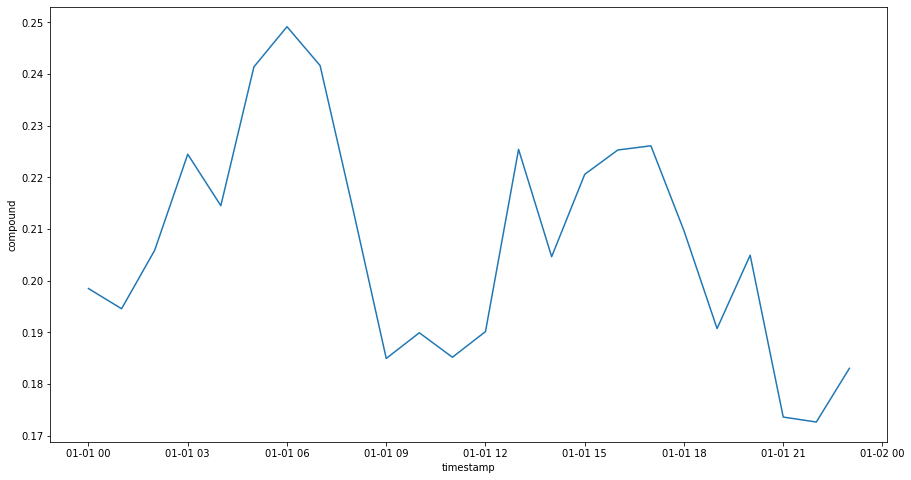

In [98]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'timestamp', y = 'compound',data = dfs)